Test Prep: 

1) Understand basic things such as creating a data set and creating a machine learning model to analyze the relationship between the variables and the data set. 

2) Load Data Set from CSV File as a dataframe

3) How many rows, columns?

4) Names of columns.

5) Create a histogram or scatterplot based on a particular column. 

6) How to apply the machine learning models .. build a classifier to see whether each record is a positive or negative class..  apply k nearest neighbor model to this dataset and see the model's prediction on a particular task  OR build a regression model to predict the sales, the income..

In [ ]:
# 1) Creating a data set and a machine learning model to analyze 
# the relationship between the variables and the data set.

# Example: A data frame with missing values
temp = pd.DataFrame({
    "Midterm": [100, 90, 80],
    "Final": [80, 90, 100],
    "Grade": ['A', np.nan, 'A']
})
temp

,Midterm,Final,Grade
0,100,80,A
1,90,90,NaN
2,80,100,A


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 2) Load Data Set from CSV File as a dataframe
# If the file is uploaded to Google temp folder
# data = pd.read_csv("file-name.csv", sep=',')

# If the file is fetched from an url
url = "https://raw.githubusercontent.com/cchanyu/MachineLearning/main/SheetData/average-height-of-men-for-selected-countries.csv"
raw_data = pd.read_csv(url)

# Display the data
print(raw_data.head())

        Entity Code  Year  Human Height (University of Tuebingen (2015))
0  Afghanistan  AFG  1870                                          168.4
1  Afghanistan  AFG  1880                                          165.7
2  Afghanistan  AFG  1930                                          166.8
3      Albania  ALB  1880                                          170.1
4      Albania  ALB  1890                                          169.8


In [ ]:
# 3) How many rows, columns?
# Show Mean STD Min Max etc
print(raw_data.describe())

# Show the size of the data set
print(raw_data.shape)

             Year  Human Height (University of Tuebingen (2015))
count  1250.00000                                    1250.000000
mean   1909.86400                                     167.647280
std      47.05989                                       4.638687
min    1810.00000                                     152.400000
25%    1872.50000                                     164.600000
50%    1910.00000                                     167.500000
75%    1950.00000                                     170.500000
max    1980.00000                                     183.200000
(1250, 4)


In [ ]:
# 4) Names of columns.
# Show the data type of each column
print(raw_data.dtypes)

# Is there any missing values?
raw_data.isnull().sum()

Entity                                            object
Code                                              object
Year                                               int64
Human Height (University of Tuebingen (2015))    float64
dtype: object


Entity                                           0
Code                                             0
Year                                             0
Human Height (University of Tuebingen (2015))    0
dtype: int64

      Height(cm)
Year            
1900       169.4
1910       170.9
1920       171.0
1930       173.9
1940       174.9
1950       176.0
1960       176.9
1970       177.1
1980       176.8


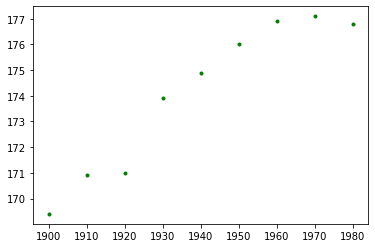

In [ ]:
# 5) Create a histogram or scatterplot based on a particular column.
# Filtering the dataset
filter = (raw_data["Entity"] == "United Kingdom") & (raw_data['Year'] >= 1900)
data = raw_data[filter]

# Cleaning the dataset
data = data.set_index(["Year"]) # Setting year tab as index tab
data.drop(['Entity', 'Code'], axis=1, inplace=True) # Deleting Entity and Code tab
data = data.rename(columns={'Human Height (University of Tuebingen (2015))': "Height(cm)"}) # Renaming Heights tab

# Displaying the dataset
print(data.head(10))
heights = data['Height(cm)']
years = data.index
plt.plot(years, heights, 'g.')

In [ ]:
# 6) How to apply the machine learning models .. 

# Train a linear regression model using sklearn
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(data[['TV']], data[['sales']])

# Build the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(df_train.iloc[:, :4], df_train['Is_Virginica'])

# build a classifier to see whether each record is a positive or negative class.. 
# confusion matrix (TN, FP, FN, TP) (week7 logistic regression)
# array([[x1, x2],
#       [x3, x4]])
# x1 = True Negative (accurate), x2 = False Positive (Type I Error)
# x3 = False Negative (Type II Error), x4 = True Positive (accurate)
from sklearn.metrics import confusion_matrix

confusion_matrix(df_test['Is_Virginica'], test_predictions)

# apply k nearest neighbor model to this dataset and see the model's prediction 
# kNN model (week3 classification)
from sklearn.neighbors import KNeighborsClassifier
training_data, test_data = train_test_split(raw_data, test_size=0.2)
model_3nn = KNeighborsClassifier(n_neighbors=3)
model_3nn.fit(training_data[input_cols], training_data['y'])

test_data['prediction'] = model_3nn.predict(test_data[input_cols])
test_data.head()

accuracy_score(test_data['y'], test_data['prediction'])

# on a particular task OR build a regression model to predict the sales, the income..
